# Dataset Information

We perform energy analysis using 12 different building shapes simulated in Ecotect (Ecotect Software has been used to calculate building's energy consumption by simulating its context within the environment.). The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

#Attribute Information:

- The dataset contains eight attributes (or features, denoted by X1…X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:

X1 Relative Compactness

X2 Surface Area

X3 Wall Area

X4 Roof Area

X5 Overall Height

X6 Orientation

X7 Glazing Area

X8 Glazing Area Distribution

y1 Heating Load

y2 Cooling Load

(y1 and y2 are the target variables)



In [7]:
# Importing Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

In [8]:
df = pd.read_excel('ENB2012_data.xlsx')

In [9]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Observations

There are 8 features in the dataset and they are labelled X1 to X8 and 2 target variables , Y1 and Y2. There are 768 samples in the dataset. There are only continuous varibales in the dataset, no noticeable categorical variable(s).

Action

For analysis and modeling purpose, the features and targets will be renamed for proper identification.

In [10]:

# Data Preprocessing
df.columns = ['Relative_Compactness', 'Surface_Area',
              'Wall_Area', 'Roof_Area', 'Overall_Height',
              'Orientation', 'Glazing_Area',
              'Glazing_Area_Distribution', 'Heating_Load',
              'Cooling_Load']


In [11]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [12]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [14]:
df.dtypes

Relative_Compactness         float64
Surface_Area                 float64
Wall_Area                    float64
Roof_Area                    float64
Overall_Height               float64
Orientation                    int64
Glazing_Area                 float64
Glazing_Area_Distribution      int64
Heating_Load                 float64
Cooling_Load                 float64
dtype: object

checking for missing values in each column of the dataset

In [15]:
df.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

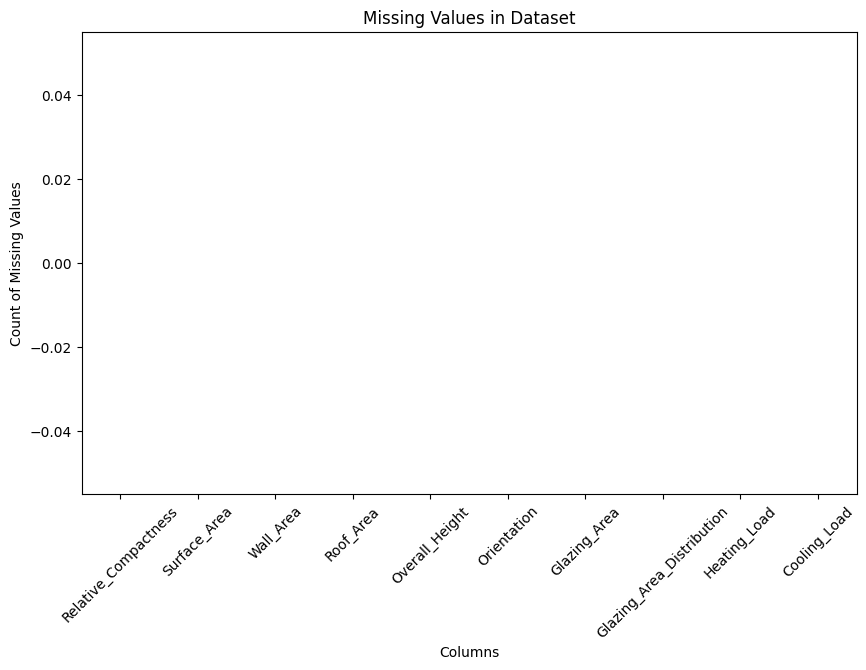

In [16]:
import matplotlib.pyplot as plt

# Count missing values in each column
missing_values = df.isnull().sum()

# Plotting missing values
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in Dataset')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)
plt.show()


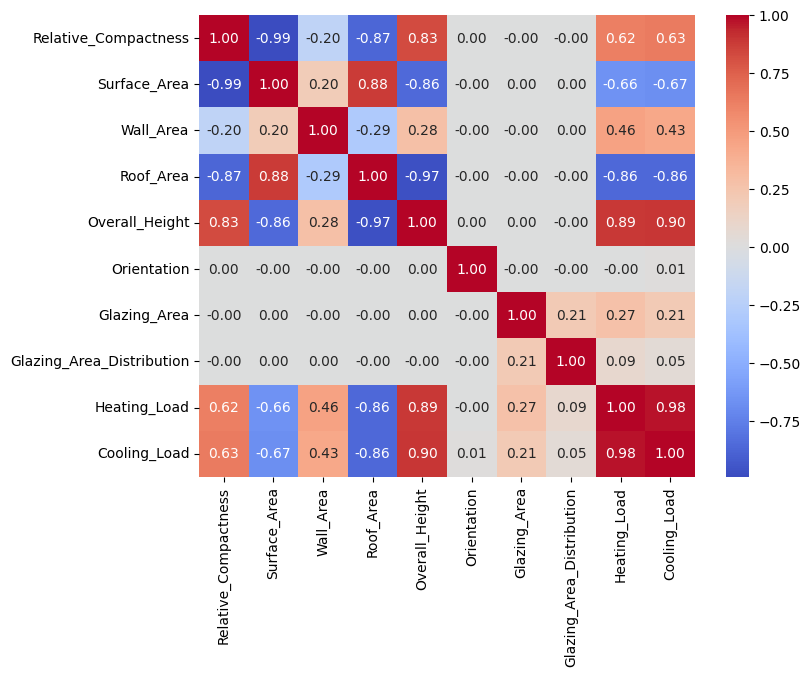

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.show()

Key Observations

Relationship between Features and Target Variables

-The most correlated features with the target variables are Roof Area, Overall Height with negative and positive correlation respectively. -Surface Area has a slightly negative correlation with the target variable

Orientation , Wall Area, Grazing Area, Grazing Area Distribution have very low correlation with the target
Relationship between Features

Surface Area and Relative Compactness have very high negative correlation of 0.


Wall Area has low correlation with other features
Orientation has zero or almost zero correlation with other features
Relationship between Targets

Cooling Load and Heating Load are highly correlated



Insights

The factors that can affect the Cooling/Heating Load of a building are The Roof Area, and Overall Height, Relative Compactness and Surface Area

The heatingload and cooling load show a high correlation and also almost identical distribution so one of them can be used during modelling.

Action

Surface Area will be dropped as it has more correlation with other features compared to Relative Compactness. This is done to avoid collinearity.

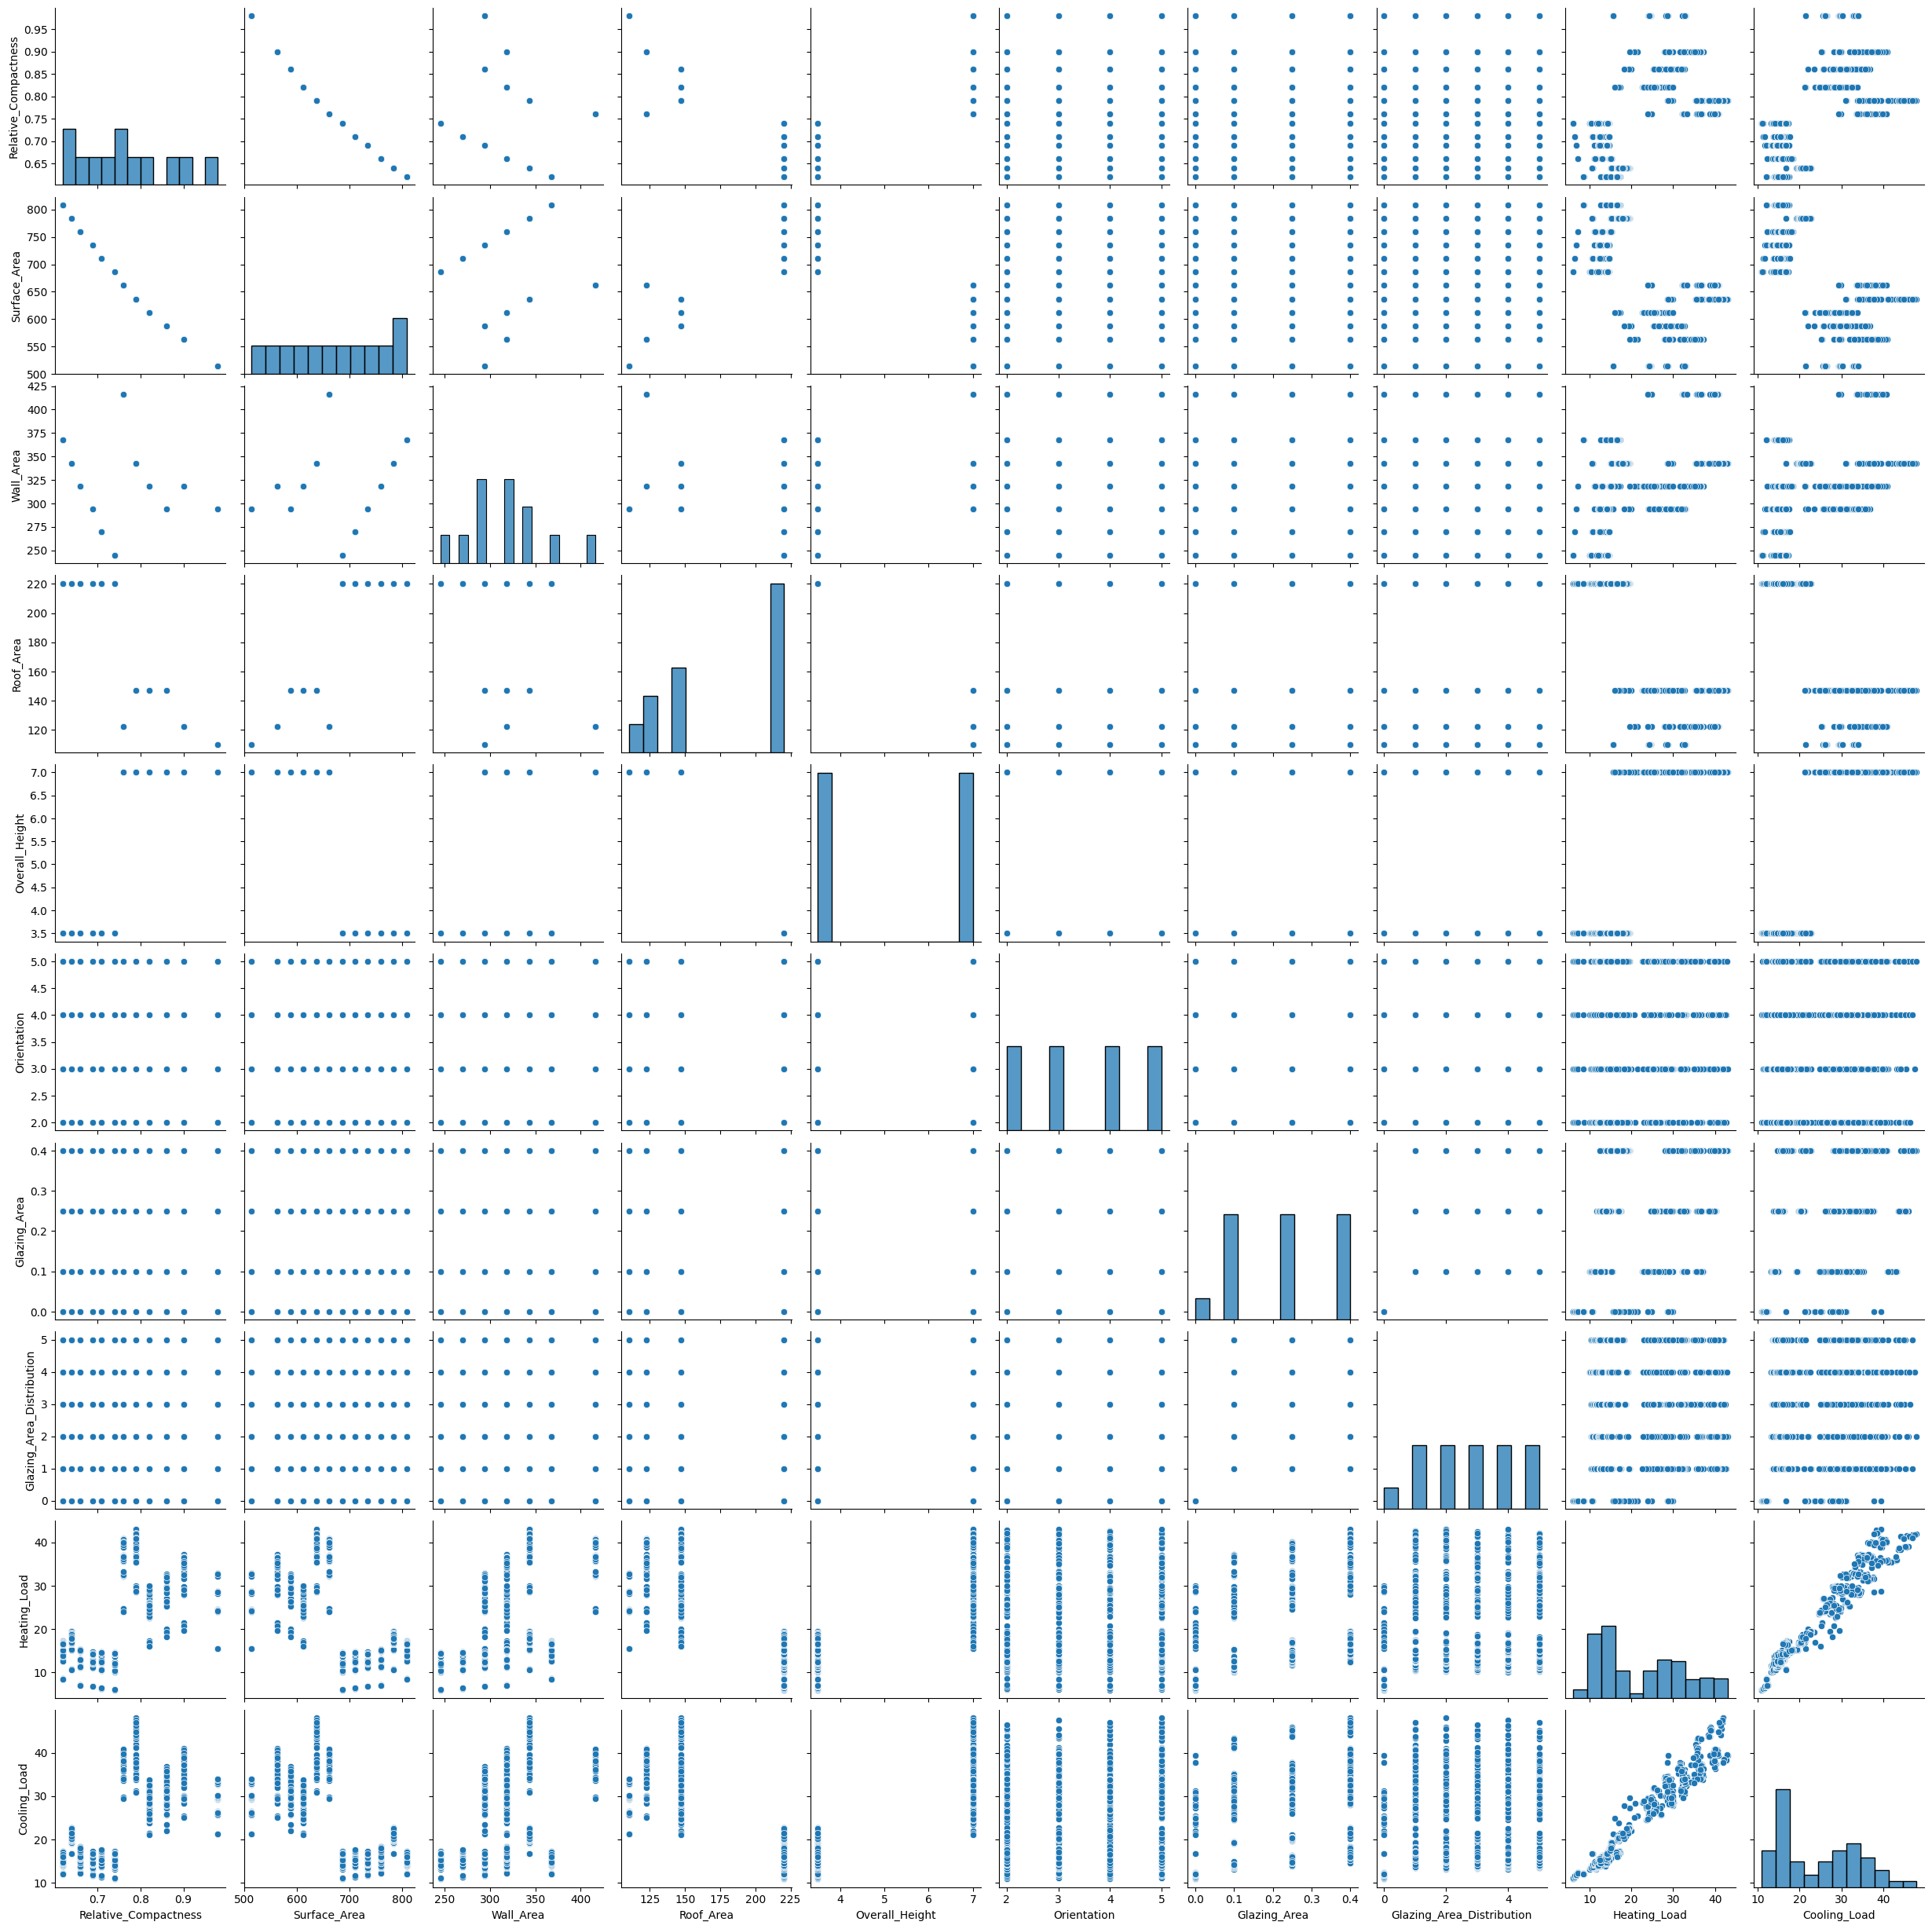

In [18]:
sns.pairplot(df)
plt.show()

In [19]:
# Feature Engineering
df['Floor_Area'] = df['Surface_Area'] - (df['Wall_Area'] + df['Roof_Area'])
df = df[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Floor_Area',
         'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution',
         'Heating_Load', 'Cooling_Load']]

In [20]:
# Data Splitting
X = df.drop(['Heating_Load', 'Cooling_Load'], axis=1)
y_heat = df['Heating_Load']
y_cool = df['Cooling_Load']
X_train, X_test, y_train_heat, y_test_heat, y_train_cool, y_test_cool = train_test_split(X, y_heat, y_cool, test_size=0.2, random_state=11)


In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 274 to 703
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       614 non-null    float64
 1   Surface_Area               614 non-null    float64
 2   Wall_Area                  614 non-null    float64
 3   Roof_Area                  614 non-null    float64
 4   Floor_Area                 614 non-null    float64
 5   Overall_Height             614 non-null    float64
 6   Orientation                614 non-null    int64  
 7   Glazing_Area               614 non-null    float64
 8   Glazing_Area_Distribution  614 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 48.0 KB


In Python's scikit-learn library, StandardScaler() is a method used for standardizing features by removing the mean and scaling to unit variance.

- It helps to normalize the features and prevent any one feature from dominating the others due to its scale.

In [22]:
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 **Models**

In [23]:
# Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(),
    'Support Vector Machine (SVR)': SVR()
}

# Hyperparameter Tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 9],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_scaled, y_train_heat)
best_params_rf = grid_search_rf.best_params_

# Model Training and Evaluation
results = []
for name, model in models.items():
    if name == 'Random Forest Regression':
        model.set_params(**best_params_rf)
    model.fit(X_train_scaled, y_train_heat)

    # Calculate train score
    y_train_pred_heat = model.predict(X_train_scaled)
    train_r2 = r2_score(y_train_heat, y_train_pred_heat)

    # Calculate test score
    y_test_pred_heat = model.predict(X_test_scaled)
    test_r2 = r2_score(y_test_heat, y_test_pred_heat)

    # Calculate R2 score and Mean Squared Error
    mse = mean_squared_error(y_test_heat, y_test_pred_heat)

    results.append({'Model': name, 'Train R2 Score': train_r2, 'Test R2 Score': test_r2, 'Mean Squared Error': mse})

# Comparison
results_df = pd.DataFrame(results)
print(results_df)

                          Model  Train R2 Score  Test R2 Score  \
0             Linear Regression        0.915823       0.917116   
1      Random Forest Regression        0.999451       0.997898   
2  Support Vector Machine (SVR)        0.931295       0.927667   

   Mean Squared Error  
0            8.988393  
1            0.227956  
2            7.844164  


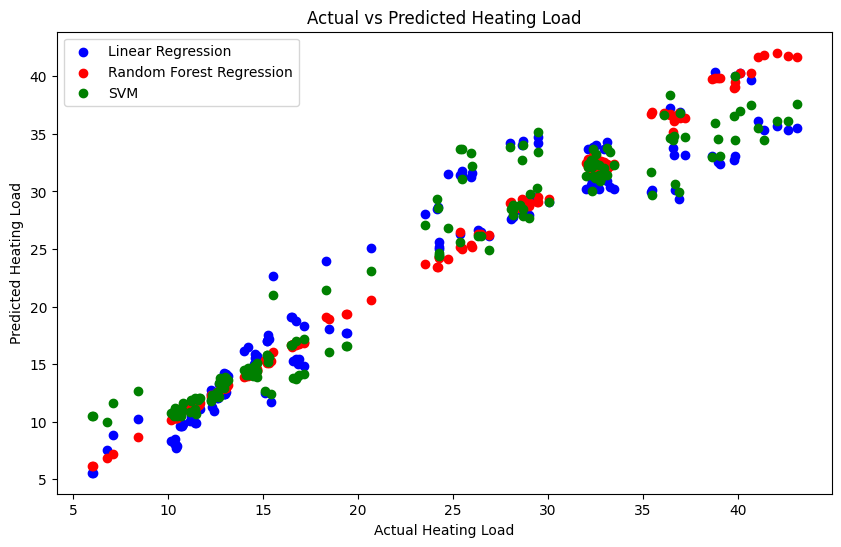

In [24]:
# Plotting the actual vs predicted heating load for each model
plt.figure(figsize=(10, 6))

# Linear Regression
plt.scatter(y_test_heat, models['Linear Regression'].predict(X_test_scaled), color='blue', label='Linear Regression')

# Random Forest Regression
plt.scatter(y_test_heat, models['Random Forest Regression'].predict(X_test_scaled), color='red', label='Random Forest Regression')

# Support Vector Machine (SVR)
plt.scatter(y_test_heat, models['Support Vector Machine (SVR)'].predict(X_test_scaled), color='green', label='SVM')

plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('Actual vs Predicted Heating Load')
plt.legend()
plt.show()


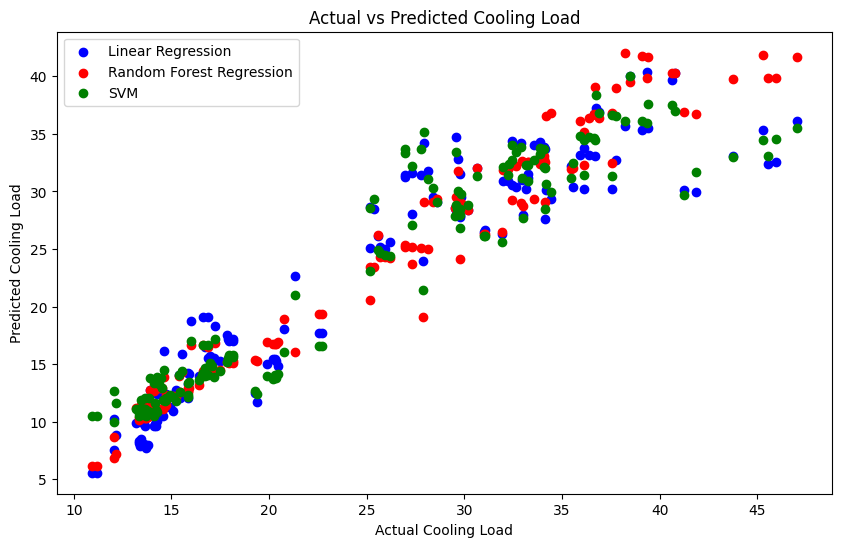

In [25]:
# Plotting the actual vs predicted cooling load for each model
plt.figure(figsize=(10, 6))

# Linear Regression
plt.scatter(y_test_cool, models['Linear Regression'].predict(X_test_scaled), color='blue', label='Linear Regression')

# Random Forest Regression
plt.scatter(y_test_cool, models['Random Forest Regression'].predict(X_test_scaled), color='red', label='Random Forest Regression')

# Support Vector Machine (SVR)
plt.scatter(y_test_cool, models['Support Vector Machine (SVR)'].predict(X_test_scaled), color='green', label='SVM')

plt.xlabel('Actual Cooling Load')
plt.ylabel('Predicted Cooling Load')
plt.title('Actual vs Predicted Cooling Load')
plt.legend()
plt.show()


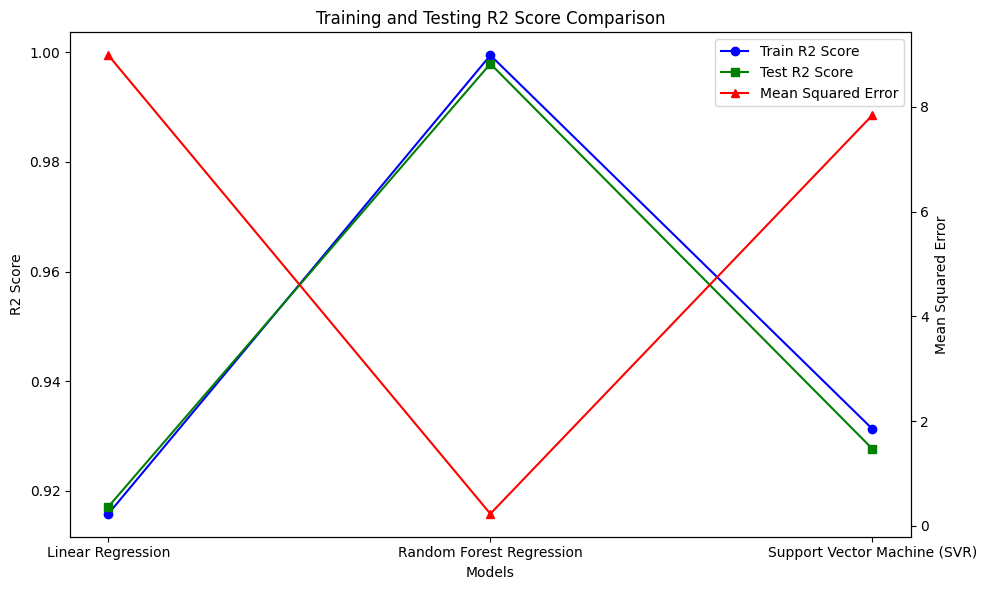

In [26]:
import matplotlib.pyplot as plt

# Extracting model names
model_names = results_df['Model']

# Extracting scores and MSE
train_scores = results_df['Train R2 Score']
test_scores = results_df['Test R2 Score']
mse_scores = results_df['Mean Squared Error']

# Creating subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting scores
ax1.plot(model_names, train_scores, marker='o', label='Train R2 Score', color='blue')
ax1.plot(model_names, test_scores, marker='s', label='Test R2 Score', color='green')

# Adding labels and title
ax1.set_xlabel('Models')
ax1.set_ylabel('R2 Score')
ax1.set_title('Training and Testing R2 Score Comparison')

# Creating a second y-axis
ax2 = ax1.twinx()
ax2.plot(model_names, mse_scores, marker='^', label='Mean Squared Error', color='red')
ax2.set_ylabel('Mean Squared Error')

# Adding legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Rotating x-axis labels
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


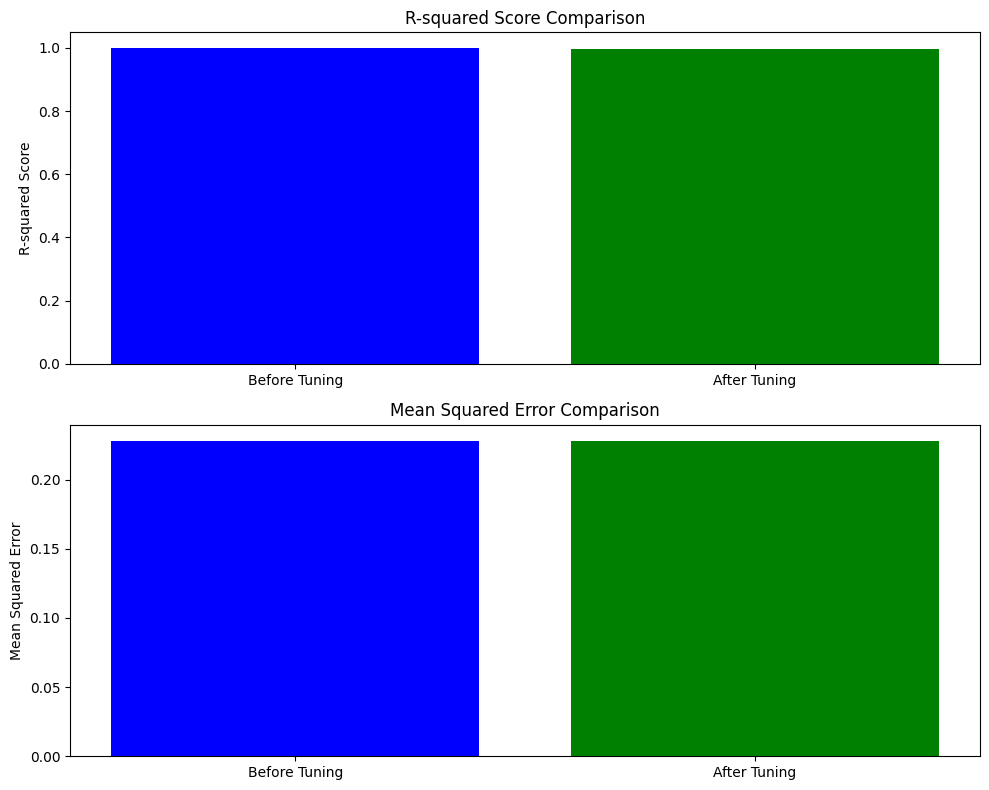

In [27]:
import matplotlib.pyplot as plt

# Define model names
model_names = ['Before Tuning', 'After Tuning']

# Define performance metrics
r2_scores = [0.999458, 0.997895]  # R-squared scores
mse_scores = [0.228256, 0.228256]  # Mean Squared Error

# Create subplots
fig, axs = plt.subplots(2, figsize=(10, 8))

# Plot R-squared scores
axs[0].bar(model_names, r2_scores, color=['blue', 'green'])
axs[0].set_ylabel('R-squared Score')
axs[0].set_title('R-squared Score Comparison')

# Plot Mean Squared Error
axs[1].bar(model_names, mse_scores, color=['blue', 'green'])
axs[1].set_ylabel('Mean Squared Error')
axs[1].set_title('Mean Squared Error Comparison')

# Show plot
plt.tight_layout()
plt.show()
